**SYPA: Fundamental Analysis of Foreign Direct Investment** <br>
*4_Model_Selection_Neural_Networks* <br>
Harvard SYPA <br>
User: Jake Schneider <br>
Date Created: March 1, 2020 <br>
Date Updated: March 1, 2020

----

**Note: This needs to be run from the tfcs109a Conda Environment**

**Model Selection Strategy** <br>
1. Lasso <br>
2. Random Forest <br>
3. Neural Networks

**Set Seed for Randomness**

In [1]:
# See Random Seed
from numpy.random import seed
seed(13)

import tensorflow
tensorflow.random.set_seed(13)

**Load Packages**

In [54]:
#Import libraries
import sys
import pandas as pd
from datetime import date, datetime, time, timedelta
import json
import requests
import numpy as np
import math

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='ticks', context='talk')

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import eli5
from eli5.sklearn import PermutationImportance

from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import export_graphviz
import pydot

import statsmodels.formula.api as sm
from pprint import pprint

import itertools

----

**Load Data**

In [3]:
# Load Data

final_df = pd.read_csv('../../2_Inputs/Final/final_df.csv')
final_df = final_df.drop(["Unnamed: 0"], axis = 1)
final_df.head()

,country,date,code,iso2Code,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,...,Labor.force.participation.rate..total....of.total.population.ages.15.64...modeled.ILO.estimate.,Ratio.of.female.to.male.labor.force.participation.rate......modeled.ILO.estimate.,Unemployment..total....of.total.labor.force...modeled.ILO.estimate.,Net.migration,Prevalence.of.undernourishment....of.population.,Life.expectancy.at.birth..total..years.,Fertility.rate..total..births.per.woman.,Population.ages.65.and.above....of.total.population.,Unmet.need.for.contraception....of.married.women.ages.15.49.,Voice.and.Accountability..Estimate.y
0,Afghanistan,1960.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,61.736799,74.856875,4.1602,276087.2,13.9,32.446,7.45,2.798308,15.06,-0.199767
1,Afghanistan,1961.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,61.736799,74.856875,7.6538,195999.6,13.9,32.962,7.45,2.808131,15.06,-0.199767
2,Afghanistan,1962.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,69.058401,71.941730,5.2414,-20000.0,13.9,33.471,7.45,2.804113,15.06,-0.199767
3,Afghanistan,1963.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,63.873800,54.693568,7.0762,278921.8,13.9,33.971,7.45,2.786171,15.06,-0.193007
4,Afghanistan,1964.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,66.003000,59.874157,6.8932,195999.6,13.9,34.463,7.45,2.754223,15.06,-0.193007


In [4]:
# Load In Sample

in_sample = pd.read_csv('../../2_Inputs/Final/in_sample.csv')
in_sample = in_sample.drop(["Unnamed: 0"], axis = 1)
in_sample.head()

,country,date,code,iso2Code,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,...,Labor.force.participation.rate..total....of.total.population.ages.15.64...modeled.ILO.estimate.,Ratio.of.female.to.male.labor.force.participation.rate......modeled.ILO.estimate.,Unemployment..total....of.total.labor.force...modeled.ILO.estimate.,Net.migration,Prevalence.of.undernourishment....of.population.,Life.expectancy.at.birth..total..years.,Fertility.rate..total..births.per.woman.,Population.ages.65.and.above....of.total.population.,Unmet.need.for.contraception....of.married.women.ages.15.49.,Voice.and.Accountability..Estimate.y
0,Afghanistan,1960.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,61.736799,74.856875,4.1602,276087.2,13.9,32.446,7.45,2.798308,15.06,-0.199767
1,Afghanistan,1961.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,61.736799,74.856875,7.6538,195999.6,13.9,32.962,7.45,2.808131,15.06,-0.199767
2,Afghanistan,1962.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,69.058401,71.941730,5.2414,-20000.0,13.9,33.471,7.45,2.804113,15.06,-0.199767
3,Afghanistan,1963.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,63.873800,54.693568,7.0762,278921.8,13.9,33.971,7.45,2.786171,15.06,-0.193007
4,Afghanistan,1964.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,66.003000,59.874157,6.8932,195999.6,13.9,34.463,7.45,2.754223,15.06,-0.193007


In [5]:
# Load Lock Box

lock_box = pd.read_csv('../../2_Inputs/Final/lock_box.csv')
lock_box = lock_box.drop(["Unnamed: 0"], axis = 1)
lock_box.head()

,country,date,code,iso2Code,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,...,Labor.force.participation.rate..total....of.total.population.ages.15.64...modeled.ILO.estimate.,Ratio.of.female.to.male.labor.force.participation.rate......modeled.ILO.estimate.,Unemployment..total....of.total.labor.force...modeled.ILO.estimate.,Net.migration,Prevalence.of.undernourishment....of.population.,Life.expectancy.at.birth..total..years.,Fertility.rate..total..births.per.woman.,Population.ages.65.and.above....of.total.population.,Unmet.need.for.contraception....of.married.women.ages.15.49.,Voice.and.Accountability..Estimate.y
0,Afghanistan,2015.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,66.914001,57.110746,1.679,52807.2,28.60,63.377000,4.9760,2.478662,24.50,-1.117563
1,Afghanistan,2016.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,67.268997,58.104539,1.634,18138.6,29.50,63.763000,4.8000,2.519923,15.06,-1.039843
2,Afghanistan,2017.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,67.606003,59.008129,1.559,-314602.0,29.80,64.130000,4.6330,2.554251,15.06,-0.992470
3,Afghanistan,2018.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,67.686996,59.244647,1.542,52807.2,27.86,69.075083,2.1800,2.584927,15.06,-0.994720
4,Afghanistan,2019.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,67.772003,59.479106,1.519,26108.8,3.68,66.443400,3.9094,8.794946,14.66,0.853073


In [6]:
# Load Validation Table

results = pd.read_csv('../../3_Outputs/Model Selection/Validation Table/Validation Table 2.csv')
results = results.drop(["Unnamed: 0"], axis = 1)
results.head()

,Model Name,Model Type,Minimum RMSE,Variables
0,Linear Regression,Linear Model,20021.89,2313
1,Ridge Regression,Linear Model,12131.99,2310
2,Lasso Regression,Linear Model,462.40,986
3,Random Forest,Tree-Based,143.22,2310


----

**Prerequisites**

In [7]:
in_sample.loc[:,'longitude':].shape

(11935, 2314)

In [8]:
# Xs

Xs = in_sample.loc[:,'longitude':]
Xs = Xs.drop(['Foreign direct investment, net inflows (% of GDP)'], axis = 1)
Xs.shape

(11935, 2313)

In [9]:
# y

y = in_sample['Foreign direct investment, net inflows (% of GDP)']
y.shape

(11935,)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(in_sample.loc[:,'longitude':], in_sample.loc[:,'Foreign direct investment, net inflows (% of GDP)'], test_size=0.2, random_state=13)

In [11]:
X_train = X_train.drop(['Foreign direct investment, net inflows (% of GDP)'], axis = 1)
X_test = X_test.drop(['Foreign direct investment, net inflows (% of GDP)'], axis = 1)

In [12]:
# Check Dimensions

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9548, 2313)
(9548,)
(2387, 2313)
(2387,)


----

**Model Selection: Neural Networks**

*Deep Neural Networks (DNN)* <br>
Docs: https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33 <br>
Hyptertuning:https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/ <br>
Resources: Homework from Harvard Compsci 209a <br>

In [13]:
##DNN
#
#NN_model = Sequential()
#
## The Input Layer :
#NN_model.add(Dense(128, kernel_initializer='normal',input_shape = (X_train.shape[1],), activation='relu'))
#
## The Hidden Layers :
#NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#
## The Output Layer :
#NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))
#
## Compile the network :
#NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
#NN_model.summary()

In [14]:
## Define a Checkpoint
#
#checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
#checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
#callbacks_list = [checkpoint]

In [15]:
##Train the DNN
#
#NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

In [16]:
# DNN 1

batch_size = 128
epochs = 100
num_classes = 2 
nodes_layers = [100,100,100]  #[100,100, 100]  #[80,80,80] #[100,100, 100] 
kernel_weight = 0.003
bias_weight = 0.003
activity_weight = 0.0

#reset the model 
model1 = tf.keras.models.Sequential()
# first hidden layer
model1.add(tf.keras.layers.Dense(nodes_layers[0], activation='relu', input_shape=(2313,)))
# hidden layers 
for s in nodes_layers[1:]:
    model1.add(tf.keras.layers.Dense(units = s,  activation = 'relu', 
                                    kernel_regularizer=tf.keras.regularizers.l2(kernel_weight), 
                                    bias_regularizer=tf.keras.regularizers.l2(bias_weight) ))
    model1.add(tf.keras.layers.Dropout(0.1))

# output layer 
model1.add(tf.keras.layers.Dense(1,  activation='sigmoid'))

# Summary 
print(model1.summary())


# compile it 


optimize = tf.keras.optimizers.Adam(learning_rate=0.0007, beta_1=0.9, beta_2=0.999, amsgrad=False)

model1.compile(optimizer=optimize, loss='mean_squared_error', metrics=['mean_squared_error'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               231400    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 251,701
Trainable params: 251,701
Non-trainable params: 0
__________________________________________________

Train on 8354 samples, validate on 3581 samples
Epoch 1/100
8354/8354 [==============================] - 2s 204us/sample - loss: 12561.4431 - mean_squared_error: 12561.0322 - val_loss: 10500.4203 - val_mean_squared_error: 10500.1641
Epoch 2/100
8354/8354 [==============================] - 1s 112us/sample - loss: 12559.9386 - mean_squared_error: 12559.7705 - val_loss: 10498.2514 - val_mean_squared_error: 10498.1514
Epoch 3/100
8354/8354 [==============================] - 1s 111us/sample - loss: 12558.5011 - mean_squared_error: 12558.4375 - val_loss: 10497.6105 - val_mean_squared_error: 10497.5762
Epoch 4/100
8354/8354 [==============================] - 1s 112us/sample - loss: 12557.3654 - mean_squared_error: 12557.3408 - val_loss: 10497.7836 - val_mean_squared_error: 10497.7715
Epoch 5/100
8354/8354 [==============================] - 1s 112us/sample - loss: 12559.6840 - mean_squared_error: 12559.6777 - val_loss: 10498.9899 - val_mean_squared_error: 10498.9873
Epoch 6/100
8354/8354 [====

Epoch 44/100
8354/8354 [==============================] - 1s 124us/sample - loss: 12538.9894 - mean_squared_error: 12538.9912 - val_loss: 10482.3319 - val_mean_squared_error: 10482.3320
Epoch 45/100
8354/8354 [==============================] - 1s 124us/sample - loss: 12538.9893 - mean_squared_error: 12538.9883 - val_loss: 10482.3321 - val_mean_squared_error: 10482.3311
Epoch 46/100
8354/8354 [==============================] - 1s 123us/sample - loss: 12538.9892 - mean_squared_error: 12538.9902 - val_loss: 10482.3323 - val_mean_squared_error: 10482.3320
Epoch 47/100
8354/8354 [==============================] - 1s 125us/sample - loss: 12538.9888 - mean_squared_error: 12538.9873 - val_loss: 10482.3319 - val_mean_squared_error: 10482.3291
Epoch 48/100
8354/8354 [==============================] - 1s 124us/sample - loss: 12538.9891 - mean_squared_error: 12538.9873 - val_loss: 10482.3322 - val_mean_squared_error: 10482.3320
Epoch 49/100
8354/8354 [==============================] - 1s 123us/sam

8354/8354 [==============================] - 1s 127us/sample - loss: 12553.2195 - mean_squared_error: 12553.2168 - val_loss: 10482.3323 - val_mean_squared_error: 10482.3320
Epoch 89/100
8354/8354 [==============================] - 1s 132us/sample - loss: 12551.8343 - mean_squared_error: 12551.8330 - val_loss: 10482.3322 - val_mean_squared_error: 10482.3311
Epoch 90/100
8354/8354 [==============================] - 1s 136us/sample - loss: 12551.3384 - mean_squared_error: 12551.3389 - val_loss: 10482.3320 - val_mean_squared_error: 10482.3301
Epoch 91/100
8354/8354 [==============================] - 1s 137us/sample - loss: 12553.0678 - mean_squared_error: 12553.0664 - val_loss: 10482.3324 - val_mean_squared_error: 10482.3311
Epoch 92/100
8354/8354 [==============================] - 1s 133us/sample - loss: 12552.6796 - mean_squared_error: 12552.6787 - val_loss: 10482.3325 - val_mean_squared_error: 10482.3311
Epoch 93/100
8354/8354 [==============================] - 1s 134us/sample - loss: 1

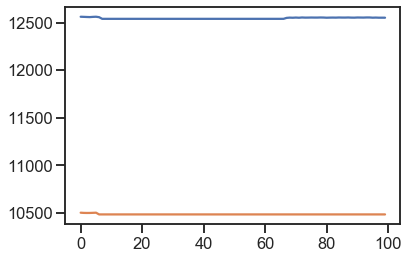

In [17]:
history_basic = model1.fit(Xs, y, batch_size=batch_size, epochs=epochs,  validation_split=.3, verbose=1) #X_train, y_train,

mse = model1.evaluate(Xs, y, verbose=False)
print("Training:", mse)

val_loss = history_basic.history['val_loss'][-1]
print("Val Acc:",val_loss)
print("Diff:", mse-val_loss)



plt.plot(history_basic.history['mean_squared_error'])
plt.plot(history_basic.history['val_loss']);

In [18]:
# Save DNN 1 for later use

# serialize model to JSON
model1_json = model1.to_json()
with open("../../3_Outputs/Model Selection/Neural Networks/DNN Model/dnn_model1.json", "w") as json_file:
    json_file.write(model1_json)
# serialize weights to HDF5
model1.save_weights("../../3_Outputs/Model Selection/Neural Networks/DNN Model/dnn_model1.h5")
print("Saved model to disk")

Saved model to disk


*Use GridSearchCV to optomize the model* <br>
Docs: https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [19]:
## Function to create model, required for KerasClassifier
#def create_model():
#    # create model
#    
#    #reset the model 
#    model = tf.keras.models.Sequential()
#    # first hidden layer
#    model.add(tf.keras.layers.Dense(nodes_layers[0], activation='relu', input_shape=(2313,)))
#    # hidden layers 
#    for s in nodes_layers[1:]:
#        model.add(tf.keras.layers.Dense(units = s,  activation = 'relu', 
#                                        kernel_regularizer=tf.keras.regularizers.l2(kernel_weight), 
#                                        bias_regularizer=tf.keras.regularizers.l2(bias_weight) ))
#        model.add(tf.keras.layers.Dropout(0.1))
#    
#    # output layer 
#    model.add(tf.keras.layers.Dense(1,  activation='sigmoid'))
#
#
#    # Compile model
#    optimize = tf.keras.optimizers.Adam(learning_rate=0.0007, beta_1=0.9, beta_2=0.999, amsgrad=False)
#    model.compile(optimizer=optimize, loss='mean_squared_error', metrics=['mean_squared_error'])
#    
#    #Return model
#    return model

In [31]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    # The Input Layer: 
    model.add(Dense(128, input_shape=(2313,), activation='relu'))
    # The Hidden Layers:
    model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    # The Output Layer
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    return model

In [32]:
# Create model

model = KerasRegressor(build_fn=create_model, verbose=1)

In [33]:
# Define the grid search parameters

batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 100, 300]
validation_split=[.1, .2, .3]
param_grid = dict(batch_size=batch_size, epochs=epochs, validation_split=validation_split)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

In [34]:
# Run Model

grid_result = grid.fit(Xs, y)

Train on 9548 samples, validate on 2387 samples
Epoch 1/100
9548/9548 [==============================] - 5s 511us/sample - loss: 12862.6820 - mean_squared_error: 12862.6904 - val_loss: 8418.8451 - val_mean_squared_error: 8418.8438
Epoch 2/100
9548/9548 [==============================] - 4s 394us/sample - loss: 12862.6821 - mean_squared_error: 12862.6895 - val_loss: 8418.8451 - val_mean_squared_error: 8418.8447
Epoch 3/100
9548/9548 [==============================] - 4s 395us/sample - loss: 12862.6821 - mean_squared_error: 12862.6826 - val_loss: 8418.8452 - val_mean_squared_error: 8418.8428
Epoch 4/100
9548/9548 [==============================] - 4s 403us/sample - loss: 12862.6820 - mean_squared_error: 12862.6865 - val_loss: 8418.8451 - val_mean_squared_error: 8418.8447
Epoch 5/100
9548/9548 [==============================] - 4s 404us/sample - loss: 12862.6820 - mean_squared_error: 12862.6768 - val_loss: 8418.8451 - val_mean_squared_error: 8418.8467
Epoch 6/100
9548/9548 [==============

9548/9548 [==============================] - 3s 342us/sample - loss: 12862.6821 - mean_squared_error: 12862.6855 - val_loss: 8418.8450 - val_mean_squared_error: 8418.8447
Epoch 45/100
9548/9548 [==============================] - 3s 346us/sample - loss: 12862.6821 - mean_squared_error: 12862.6855 - val_loss: 8418.8451 - val_mean_squared_error: 8418.8467
Epoch 46/100
9548/9548 [==============================] - 3s 345us/sample - loss: 12862.6820 - mean_squared_error: 12862.6914 - val_loss: 8418.8451 - val_mean_squared_error: 8418.8457
Epoch 47/100
9548/9548 [==============================] - 3s 339us/sample - loss: 12862.6821 - mean_squared_error: 12862.6865 - val_loss: 8418.8451 - val_mean_squared_error: 8418.8438
Epoch 48/100
9548/9548 [==============================] - 3s 336us/sample - loss: 12862.6821 - mean_squared_error: 12862.6816 - val_loss: 8418.8451 - val_mean_squared_error: 8418.8467
Epoch 49/100
9548/9548 [==============================] - 3s 336us/sample - loss: 12862.6820 

9548/9548 [==============================] - 3s 339us/sample - loss: 12862.6821 - mean_squared_error: 12862.6846 - val_loss: 8418.8451 - val_mean_squared_error: 8418.8428
Epoch 89/100
9548/9548 [==============================] - 3s 349us/sample - loss: 12862.6820 - mean_squared_error: 12862.6719 - val_loss: 8418.8452 - val_mean_squared_error: 8418.8447
Epoch 90/100
9548/9548 [==============================] - 3s 356us/sample - loss: 12862.6822 - mean_squared_error: 12862.6855 - val_loss: 8418.8450 - val_mean_squared_error: 8418.8457
Epoch 91/100
9548/9548 [==============================] - 3s 355us/sample - loss: 12862.6821 - mean_squared_error: 12862.6807 - val_loss: 8418.8451 - val_mean_squared_error: 8418.8467
Epoch 92/100
9548/9548 [==============================] - 3s 359us/sample - loss: 12862.6821 - mean_squared_error: 12862.6836 - val_loss: 8418.8451 - val_mean_squared_error: 8418.8447
Epoch 93/100
9548/9548 [==============================] - 3s 353us/sample - loss: 12862.6820 

In [35]:
# Summarize results

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -11924.408205 using {'batch_size': 20, 'epochs': 100, 'validation_split': 0.2}
-11944.623103 (1942.546570) with: {'batch_size': 10, 'epochs': 10, 'validation_split': 0.1}
-11957.102367 (1964.447810) with: {'batch_size': 10, 'epochs': 10, 'validation_split': 0.2}
-11956.827736 (1942.953169) with: {'batch_size': 10, 'epochs': 10, 'validation_split': 0.3}
-11933.533050 (1956.297479) with: {'batch_size': 10, 'epochs': 100, 'validation_split': 0.1}
-11947.973706 (1965.872613) with: {'batch_size': 10, 'epochs': 100, 'validation_split': 0.2}
-11950.675746 (1962.487436) with: {'batch_size': 10, 'epochs': 100, 'validation_split': 0.3}
-11952.721546 (1961.031025) with: {'batch_size': 10, 'epochs': 300, 'validation_split': 0.1}
-11974.350093 (1974.484812) with: {'batch_size': 10, 'epochs': 300, 'validation_split': 0.2}
-11947.587869 (1972.114097) with: {'batch_size': 10, 'epochs': 300, 'validation_split': 0.3}
-11958.572927 (1983.878960) with: {'batch_size': 20, 'epochs': 10, 'validation_sp

In [36]:
# Prep Best Model

model2 = Sequential()
# The Input Layer: 
model2.add(Dense(128, input_shape=(2313,), activation='relu'))
# The Hidden Layers:
model2.add(Dense(256, kernel_initializer='normal',activation='relu'))
model2.add(Dense(256, kernel_initializer='normal',activation='relu'))
model2.add(Dense(256, kernel_initializer='normal',activation='relu'))
# The Output Layer
model2.add(Dense(1, activation='sigmoid'))
# Compile model
model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

Train on 9548 samples, validate on 2387 samples
Epoch 1/100
9548/9548 [==============================] - 3s 340us/sample - loss: 12857.8605 - mean_squared_error: 12857.8613 - val_loss: 8410.6502 - val_mean_squared_error: 8410.6504
Epoch 2/100
9548/9548 [==============================] - 3s 295us/sample - loss: 12857.8606 - mean_squared_error: 12857.8525 - val_loss: 8410.6502 - val_mean_squared_error: 8410.6494
Epoch 3/100
9548/9548 [==============================] - 3s 312us/sample - loss: 12857.8606 - mean_squared_error: 12857.8623 - val_loss: 8410.6503 - val_mean_squared_error: 8410.6494
Epoch 4/100
9548/9548 [==============================] - 3s 341us/sample - loss: 12857.8606 - mean_squared_error: 12857.8594 - val_loss: 8410.6503 - val_mean_squared_error: 8410.6484
Epoch 5/100
9548/9548 [==============================] - 3s 332us/sample - loss: 12857.8606 - mean_squared_error: 12857.8613 - val_loss: 8410.6501 - val_mean_squared_error: 8410.6494
Epoch 6/100
9548/9548 [==============

9548/9548 [==============================] - 3s 347us/sample - loss: 12857.8605 - mean_squared_error: 12857.8584 - val_loss: 8410.6503 - val_mean_squared_error: 8410.6523
Epoch 45/100
9548/9548 [==============================] - 3s 342us/sample - loss: 12857.8606 - mean_squared_error: 12857.8604 - val_loss: 8410.6503 - val_mean_squared_error: 8410.6504
Epoch 46/100
9548/9548 [==============================] - 3s 344us/sample - loss: 12857.8605 - mean_squared_error: 12857.8711 - val_loss: 8410.6503 - val_mean_squared_error: 8410.6514
Epoch 47/100
9548/9548 [==============================] - 3s 346us/sample - loss: 12857.8605 - mean_squared_error: 12857.8584 - val_loss: 8410.6503 - val_mean_squared_error: 8410.6504
Epoch 48/100
9548/9548 [==============================] - 3s 344us/sample - loss: 12857.8605 - mean_squared_error: 12857.8555 - val_loss: 8410.6501 - val_mean_squared_error: 8410.6533
Epoch 49/100
9548/9548 [==============================] - 3s 342us/sample - loss: 12857.8605 

9548/9548 [==============================] - 3s 360us/sample - loss: 12857.8605 - mean_squared_error: 12857.8574 - val_loss: 8410.6503 - val_mean_squared_error: 8410.6523
Epoch 89/100
9548/9548 [==============================] - 4s 372us/sample - loss: 12857.8607 - mean_squared_error: 12857.8496 - val_loss: 8410.6503 - val_mean_squared_error: 8410.6504
Epoch 90/100
9548/9548 [==============================] - 3s 361us/sample - loss: 12857.8605 - mean_squared_error: 12857.8555 - val_loss: 8410.6504 - val_mean_squared_error: 8410.6504
Epoch 91/100
9548/9548 [==============================] - 3s 344us/sample - loss: 12857.8607 - mean_squared_error: 12857.8643 - val_loss: 8410.6502 - val_mean_squared_error: 8410.6523
Epoch 92/100
9548/9548 [==============================] - 3s 342us/sample - loss: 12857.8606 - mean_squared_error: 12857.8604 - val_loss: 8410.6502 - val_mean_squared_error: 8410.6475
Epoch 93/100
9548/9548 [==============================] - 3s 343us/sample - loss: 12857.8605 

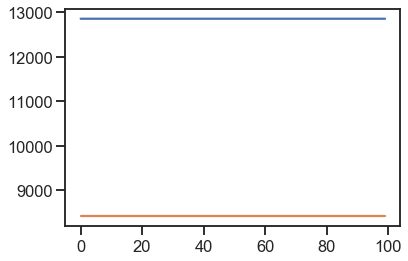

In [37]:
# Run Best Model

history_basic2 = model2.fit(Xs, y, batch_size=20, epochs=100,  validation_split=.2, verbose=1) #X_train, y_train,

loss2 = model2.evaluate(Xs, y, verbose=False)
print("Training:", loss2)

val_loss2 = history_basic2.history['val_loss'][-1]
print("Val Acc:",val_loss2)
print("Diff:", loss2-val_loss2)



plt.plot(history_basic2.history['mean_squared_error'])
plt.plot(history_basic2.history['val_loss']);

In [38]:
# Save DNN 2 for later use

# serialize model to JSON
model2_json = model2.to_json()
with open("../../3_Outputs/Model Selection/Neural Networks/DNN Model/dnn_model2_optimum.json", "w") as json_file:
    json_file.write(model2_json)
# serialize weights to HDF5
model2.save_weights("../../3_Outputs/Model Selection/Neural Networks/DNN Model/dnn_model2_optimum.h5")
print("Saved optimum model to disk")

Saved optimum model to disk


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               296192    
_________________________________________________________________
dense_10 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 257       
Total params: 461,057
Trainable params: 461,057
Non-trainable params: 0
_________________________________________________________________
None


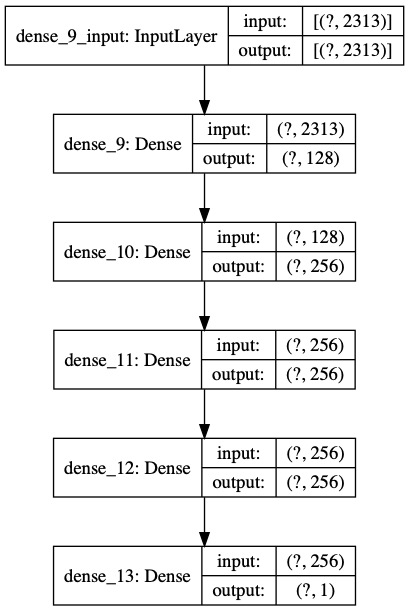

In [60]:
# Summary 
model2_summary = model2.summary()
print(model2_summary)
tf.keras.utils.plot_model(model2, to_file='../../3_Outputs/Model Selection/Neural Networks/DNN Model/dnn_model2_summary.jpg', show_shapes=True, show_layer_names=True)

In [40]:
# Print Final RMSE

optimum_rmse = round(np.sqrt(8410.6475), 2)
print(optimum_rmse)

91.71


*Variable Importance for the NN* <br>
Docs: https://stackoverflow.com/questions/45361559/feature-importance-chart-in-neural-network-using-keras-in-python/45371222

In [56]:
## See Metrics
#
#sklearn.metrics.SCORERS.keys()

In [67]:
## Variable Importance
#
#def base_model():
#    model2 = Sequential()        
#    # The Input Layer: 
#    model2.add(Dense(128, input_shape=(2313,), activation='relu'))
#    # The Hidden Layers:
#    model2.add(Dense(256, kernel_initializer='normal',activation='relu'))
#    model2.add(Dense(256, kernel_initializer='normal',activation='relu'))
#    model2.add(Dense(256, kernel_initializer='normal',activation='relu'))
#    # The Output Layer
#    model2.add(Dense(1, activation='sigmoid'))
#    # Compile model
#    model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
#    return model2
#
#my_model = KerasRegressor(build_fn=base_model)    
#my_model.fit(Xs,y)
#
#perm = PermutationImportance(my_model, random_state=13, scoring="neg_mean_squared_error").fit(Xs,y)
#eli5.show_weights(perm, feature_names = Xs.columns.tolist())

*Store Results*

In [68]:
# Store Results

nn_results = pd.DataFrame({'Model Name': 'Deep Neural Networks (DNN)', 
                    'Model Type': 'Neural Networks', 
                    #'Accuracy': [round(cv_accuracy_ridge.max(), 2)],
                    'Minimum RMSE': [optimum_rmse], 
                    #'Maximum R2': [np.max(ridge_r2)], 
                    'Variables': [len(Xs.columns) - 3]})

results = results.append(nn_results).reset_index(drop=True)
print("\nResults Dataframe:\n", results)

results.to_csv('../../3_Outputs/Model Selection/Validation Table/Validation Table 3.csv')


Results Dataframe:
                    Model Name       Model Type  Minimum RMSE  Variables
0           Linear Regression     Linear Model      20021.89       2313
1            Ridge Regression     Linear Model      12131.99       2310
2            Lasso Regression     Linear Model        462.40        986
3               Random Forest       Tree-Based        143.22       2310
4  Deep Neural Networks (DNN)  Neural Networks         91.71       2310
